In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [40]:
data=pd.read_csv('GooglePlayStore.csv')

In [41]:
data.to_excel('GooglePlayStore.xlsx')

In [42]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [43]:
data.shape

(10841, 13)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


C:\Users\sridharvumma\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sridharvumma\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(*args, **kw)>

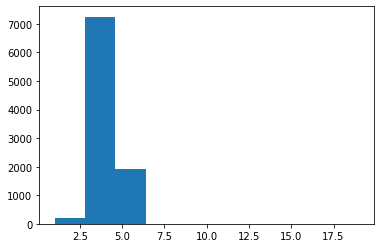

In [45]:
#Plot a histogram of Rating column to see the distribution of app ratings
plt.hist(data['Rating'])
plt.show

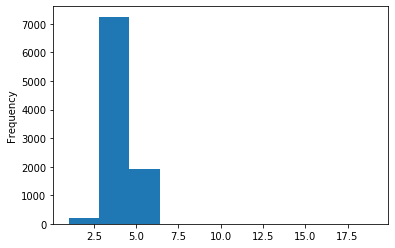

In [46]:
data['Rating'].plot(kind='hist')
plt.show()

In [47]:
#Subset the dataframe 'data' such that it only contains rows where Rating is less than or equal to 5. 
#Save the subsetted dataframe back into 'data'
data= data[data['Rating']<=5]

In [48]:
data.shape

(9366, 13)

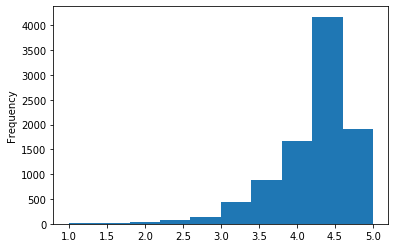

In [49]:
#Plot a histogram of Rating column again to see the distribution of app ratings
data['Rating'].plot(kind='hist')

In [50]:
#Check for the Null values. 
#Treat them if any. There should be no null values left in the data.
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [51]:
# data.count() gives the number of rows in each column excluding the missing values
# data.isnull().count() gives the number of rows including the missing values
data.count()

App               9366
Category          9366
Rating            9366
Reviews           9366
Size              9366
Installs          9366
Type              9366
Price             9366
Content Rating    9366
Genres            9366
Last Updated      9366
Current Ver       9362
Android Ver       9364
dtype: int64

In [52]:
# percentage of missing values
data.isnull().sum()/data.isnull().count()

App               0.000000
Category          0.000000
Rating            0.000000
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.000000
Price             0.000000
Content Rating    0.000000
Genres            0.000000
Last Updated      0.000000
Current Ver       0.000427
Android Ver       0.000214
dtype: float64

In [53]:
data.dropna(inplace=True)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Text(0.5, 1, 'Rating vs Category [BoxPlot]')

<Figure size 720x720 with 0 Axes>

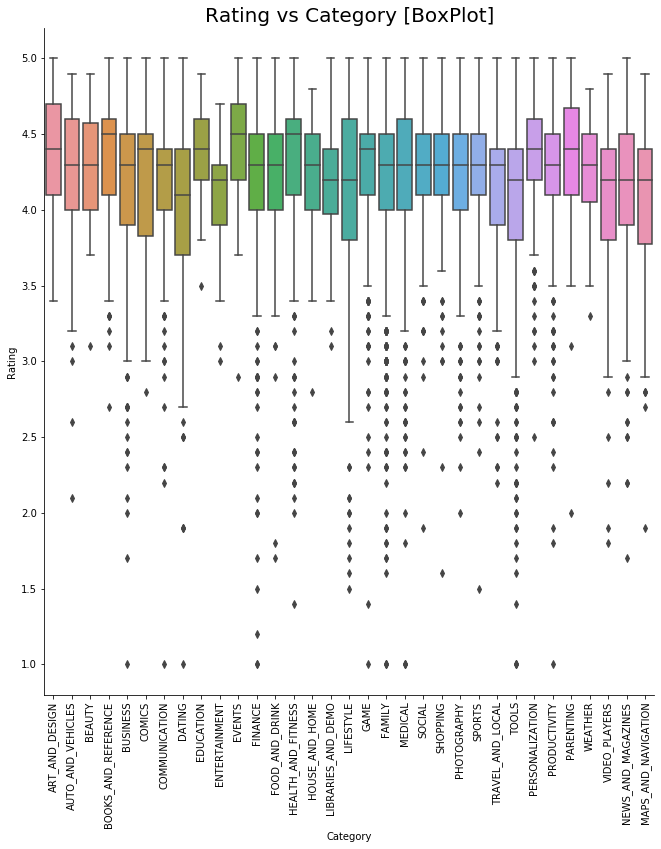

In [54]:
#Use different plots of your choice to see if there is relation between Rating and other features

#Category vs Rating
#Plotting boxplot between Rating and Category
plt.figure(figsize=(10,10))
cat= sns.catplot(x="Category",y="Rating",data=data, kind="box", height = 10)

#Rotating the xlabel rotation
cat.set_xticklabels(rotation=90)

#Setting the title of the plot
plt.title('Rating vs Category [BoxPlot]',size = 20)

In [55]:
#Category vs Installs
data['Installs'] =data['Installs'].str.replace(',','')
data['Installs'] =data['Installs'].str.replace('+','')
data['Installs'] = data['Installs'].astype(int)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

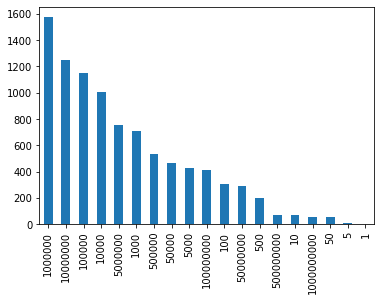

In [56]:
data['Installs'].value_counts().plot(kind='bar')
data['Installs'].value_counts()

In [57]:
le =LabelEncoder()
data['Installs']=le.fit_transform(data['Installs'])
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,8,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,11,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,13,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,15,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,10,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Text(0.5, 1.0, 'Rating vs Installs[RegPlot]')

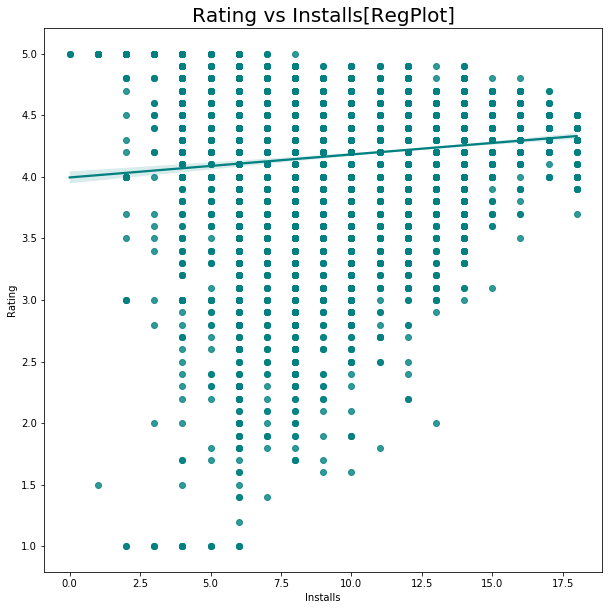

In [58]:
#Setting figure size
plt.figure(figsize = (10,10))

#Plotting Regression plot between Rating and Installs
sns.regplot(x="Installs", y="Rating", color = 'teal',data=data)

#Setting the title of the plot
plt.title('Rating vs Installs[RegPlot]',size = 20)

In [62]:
data['Price']=data['Price'].str.replace('$','')
data['Price']=data['Price'].astype(float)

Text(0.5, 1.0, 'Rating vs Price[Reg Plot]')

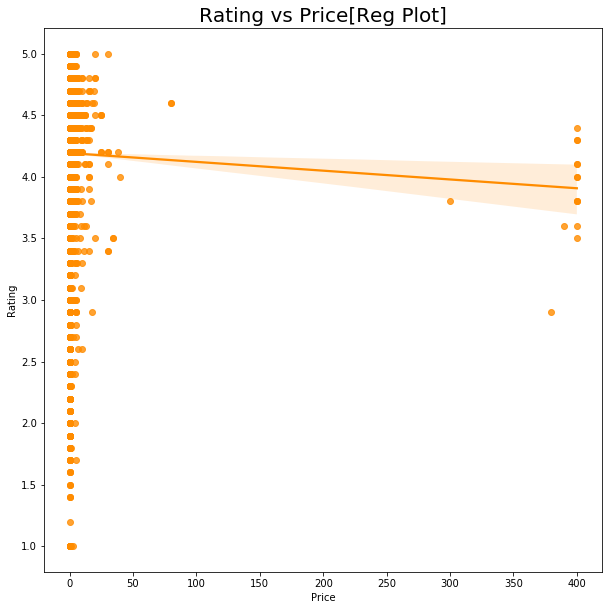

In [63]:
#Setting figure size
plt.figure(figsize=(10,10))
sns.regplot(x="Price",y="Rating",color='darkorange', data=data)
plt.title('Rating vs Price[Reg Plot]',size=20)

In [66]:
data['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [67]:
#Splitting the column to include only the first genre of each app
#Check how many different values of Genres are there. Some of the apps have multiple genres,
#let's keep only one Genre per app. store only the first genre back in Genres.
data['Genres']=data['Genres'].str.split(';').str[0]

In [68]:
data['Genres'].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [70]:
#Now calculate the mean rating of every Genres. What is the lowest and highest of average rating on Genres?
data[['Genres','Rating']].groupby(['Genres'], as_index=False).mean()
# groupby(['Genres'], as_index=False).mean()

,Genres,Rating
0,Action,4.286667
1,Adventure,4.219101
2,Arcade,4.308072
3,Art & Design,4.367187
4,Auto & Vehicles,4.190411
5,Beauty,4.278571
6,Board,4.300000
7,Books & Reference,4.344444
8,Business,4.121452
9,Card,4.102083


In [77]:
gr_mean =data.groupby(['Genres'],as_index=False)['Rating'].mean()
gr_mean

,Genres,Rating
0,Action,4.286667
1,Adventure,4.219101
2,Arcade,4.308072
3,Art & Design,4.367187
4,Auto & Vehicles,4.190411
5,Beauty,4.278571
6,Board,4.300000
7,Books & Reference,4.344444
8,Business,4.121452
9,Card,4.102083


In [75]:
gr_mean.describe()

,Rating
count,48.000000
mean,4.212486
std,0.104071
min,3.970769
25%,4.132114
50%,4.204821
75%,4.286532
max,4.435556


In [76]:
gr_mean=gr_mean.sort_values("Rating")

In [78]:
data['Last Updated']=pd.to_datetime(data['Last Updated'])
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,8,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,11,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,13,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,15,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,10,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up


In [81]:
data['Last Updated Days'] = (data['Last Updated'].max()-data['Last Updated']).dt.days
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Days
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,8,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,213
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,11,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up,205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,13,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,15,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,61
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,10,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up,49


Text(0.5, 1.0, 'Rating vs Last Updated Days [Regplot]')

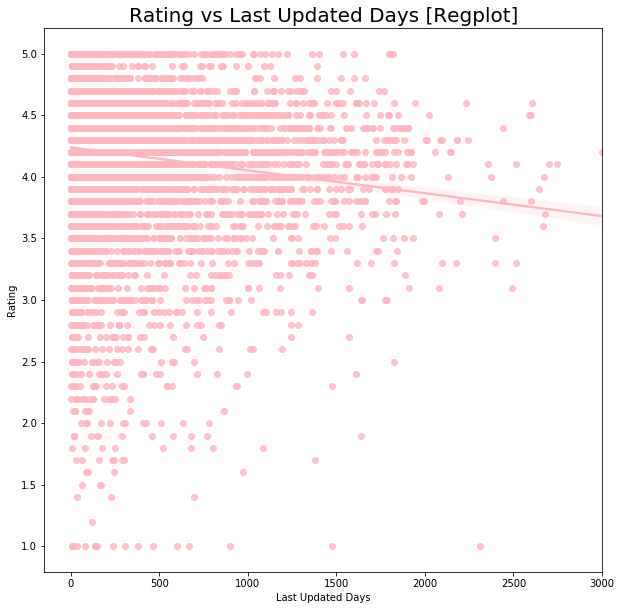

In [82]:
plt.figure(figsize=(10,10))
sns.regplot(x='Last Updated Days',y='Rating',data=data,color='lightpink')
plt.title('Rating vs Last Updated Days [Regplot]',size=20)